In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("C:/Users/1/Desktop/food_trucks.csv")

Part I: Segmentation

In [3]:
df = df.drop(columns=['vendorID'])
df.head()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,12.40,3.0,163,6.83,2,0.12,30.0
1,12.10,1.8,140,3.62,5,269.24,40.5
2,13.52,6.0,139,3.86,5,8.17,35.7
3,15.56,4.0,124,4.05,3,99.09,32.8
4,15.08,8.5,186,6.51,5,33.42,35.6


A. Euclidean distance is calculated based on the differences between the numerical values of the features of each data point. Since vendorID is a categorical variable, it cannot be used to calculate the Euclidean distance directly. 

In [4]:
df.describe()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,14.334274,3.622581,148.822581,5.008468,3.044355,52.435484,40.824194
std,1.412888,3.779335,18.942080,1.683380,1.719750,52.002194,5.775277
min,8.810000,0.000000,88.000000,-0.270000,0.000000,0.120000,25.400000
25%,13.360000,1.175000,136.750000,3.780000,2.000000,16.305000,37.200000
50%,14.395000,2.600000,149.000000,5.090000,3.000000,38.315000,40.700000
75%,15.242500,4.500000,162.000000,6.105000,4.000000,68.637500,44.200000
max,18.320000,27.300000,202.000000,10.130000,9.000000,271.730000,58.600000


B: The function provides a shape of a dataset's distribution. It includes several statistical measures, such as the count, mean, standard deviation, minimum, and maximum.This information is useful for data analysts to identify potential problems in the data that could affect model performance.

In [5]:
df.isna()
df.isna().sum()

avg_transaction_cost    0
mnths_operational       0
days_yr                 0
avg_cost_item           0
number_trucks           0
dist_lobland            0
bev_percent             0
dtype: int64

C: a. The dataset doesn't contain any missing value.
b. There is also no sign of impossible values.

D. The variables need to be standardized because each variable has different units in the dataset. Standardization can help to facilitate the comparison of variables and prevent bias in statistical analyses.

In [6]:
df_nm= df.apply(zscore)
df_nm

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,-1.371790,-0.165066,0.749975,1.084257,-0.608499,-1.008059,-1.878019
1,-1.584551,-0.483224,-0.466708,-0.826478,1.139468,4.177573,-0.056248
2,-0.577485,0.630330,-0.519607,-0.683619,1.139468,-0.852945,-0.889058
3,0.869287,0.100066,-1.313096,-0.570522,-0.025844,0.898979,-1.392214
4,0.528870,1.293159,1.966658,0.893779,1.139468,-0.366406,-0.906408
...,...,...,...,...,...,...,...
243,0.259373,-0.297632,0.220982,3.048563,-0.025844,1.439855,-0.108299
244,0.294833,-0.668817,1.120270,1.709263,0.556812,-0.311105,0.134604
245,1.103323,-0.774869,0.697076,-1.064575,0.556812,-0.155798,-0.524704
246,1.301900,-0.642303,0.220982,-0.231233,0.556812,0.761977,0.047853


C:\Users\1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


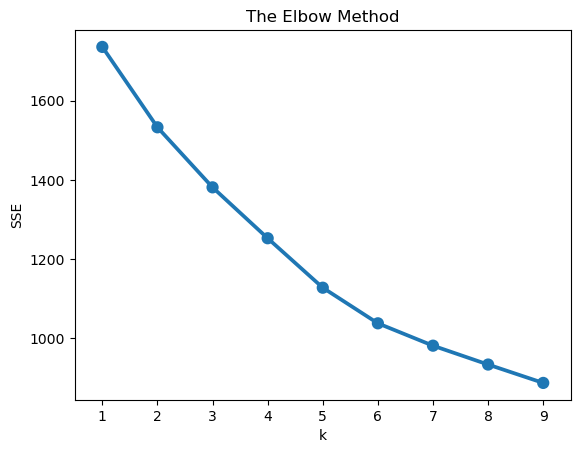

In [7]:
sse = {}
for k in range(1, 10): 
    kmeans = KMeans(n_clusters=k, random_state=654) 
    kmeans.fit(df_nm)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

F. After modifying the number of clusters to do some experimentations,  I will use 4 clusters for the k-means model.

In [8]:
kmeans = KMeans(n_clusters=4, random_state=654)
kmeans.fit(df_nm)
cluster_labels = kmeans.labels_

In [9]:
kmeans2 = df_nm.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'avg_transaction_cost': 'mean',
'mnths_operational': 'mean',
'days_yr': 'mean',
'avg_cost_item': 'mean',
'number_trucks': 'mean',
'dist_lobland': 'mean',
'bev_percent': 'mean',
}).round(2)

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
Cluster,,,,,,,
0,0.18,-0.30,-0.18,-0.23,0.93,-0.34,-0.36
1,0.42,-0.32,0.46,0.38,-0.54,-0.26,0.85
2,-0.55,-0.19,-0.48,-0.10,-0.53,0.70,-0.26
3,0.04,2.27,0.84,0.03,0.06,-0.37,-0.26


In [10]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_1 = pd.DataFrame(scaler.inverse_transform(df_std), columns=df.columns)
df_1 = df_1.assign(Cluster=cluster_labels)
df_1

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent,Cluster
0,12.40,3.0,163.0,6.83,2.0,0.12,30.0,2
1,12.10,1.8,140.0,3.62,5.0,269.24,40.5,2
2,13.52,6.0,139.0,3.86,5.0,8.17,35.7,0
3,15.56,4.0,124.0,4.05,3.0,99.09,32.8,2
4,15.08,8.5,186.0,6.51,5.0,33.42,35.6,3
...,...,...,...,...,...,...,...,...
243,14.70,2.5,153.0,10.13,3.0,127.16,40.2,1
244,14.75,1.1,170.0,7.88,4.0,36.29,41.6,1
245,15.89,0.7,162.0,3.22,4.0,44.35,37.8,0
246,16.17,1.2,153.0,4.62,4.0,91.98,41.1,0


In [11]:
df_1['Cluster'] = df_1['Cluster'].astype('category')
df_1 = df_1.round(2)

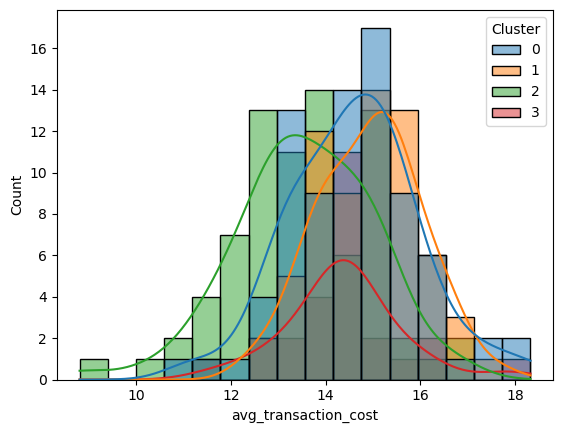

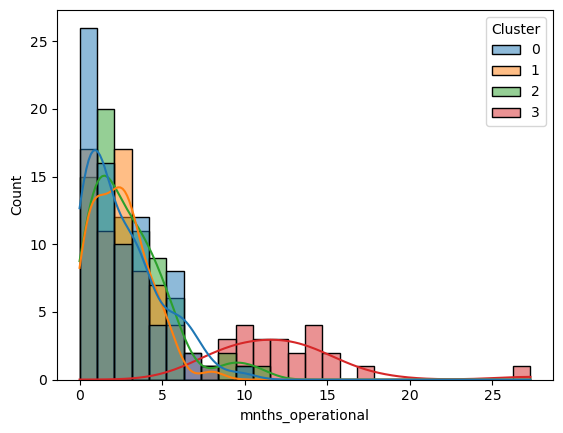

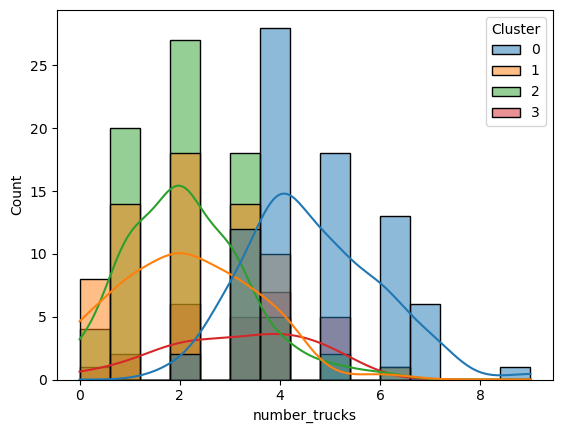

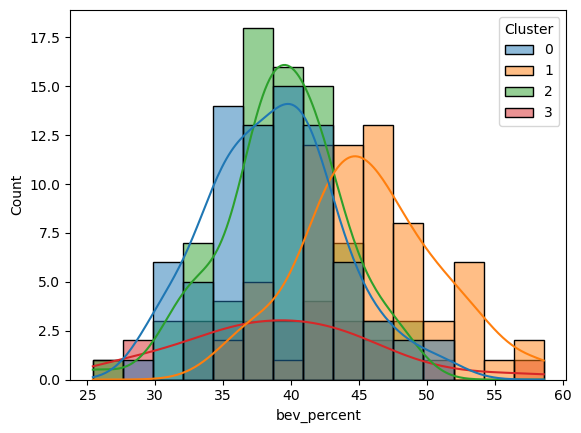

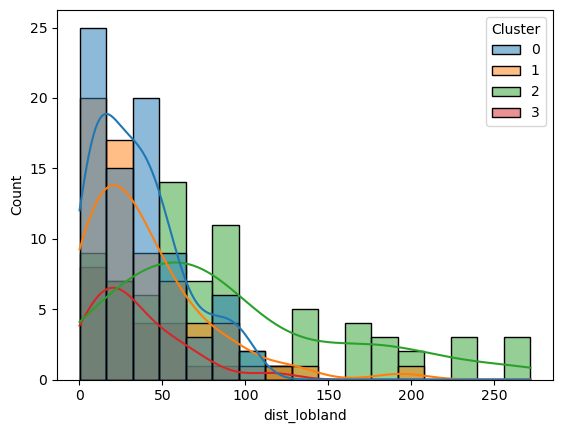

In [12]:
variables = ['avg_transaction_cost', 'mnths_operational', 
             'number_trucks', 'bev_percent', 'dist_lobland']
for i in variables:
    sns.histplot(data=df_1, x=i, hue='Cluster', kde=True)
    plt.show()

I.
> (1)The chart shows the average cost of customer expenditure per transaction for the different clusters. In terms of area, cluster 3 has the lowest spending cost, and there is little difference between the other three clusters.

> (2)The graphs show the months of operation of the food trucks, and it can be concluded that group 3 has the longest operation time, twice or more than the other groups.

> (3)The chart shows the difference in the number of trucks in the different clusters, with group 0 having the highest number of trucks and group 3 having the lowest number.

> (4)The chart conveys a comparison of the beverage share of food truck consumption, with group 3 having the lowest beverage share and group 2 having the highest share at around 40 percentage.

J.
> Cluster 0: Market invaders. The cluster has the highest number of food trucks and is closest to lobsterland, with the most food trucks operating in 1 month. Vendors are some of the newest entrants to the food category.

> Cluster 1: Midway rest station. The number of food trucks in this clustered section is concentrated near 2 and are mostly within 50 meters of lobsterland, the food trucks operate in similar months as cluster0, and the food trucks have the largest share of beverages. The suppliers are some new entrants to the scattered distribution of casual food providers.

> Cluster 2: Market Coverers: Cluster 2 has a good number of food trucks at locations between 0-250 meters from lobsterland, with the most at 50 meters, although the months of operation are also concentrated within May. Costs are relatively low compared to the other clusters, so suppliers are likely to be distant snack providers.

> Cluster 3: Long-term local operators: Cluster 3 has a significantly smaller number of food trucks, with a maximum of 6, but the longest months of operation, concentrated in 10-15 months, and located within 50 meters of lobsterland. The supplier is therefore likely to be a large local food provider.

K: With this classification model, Lobsterland can use it to select suppliers which can bring more benefits and less expenditures to the park. For example, the third group is a very robust choice: first, the suppliers have been supplying the park for a long time, indicating that they meet the requirements of customers in terms of business model and taste selection; second, they do not have many food trucks, which do not occupy much space in the park, but can provide continuous and stable revenue; finally, the location of food trucks is extremely close to the park, which attracts visitors and leads to increased consumption and revenue in other areas of the park.

#Part Ⅱ

In [39]:
woodie = pd.read_csv("C:/Users/1/Desktop/woodie.csv")
woodie.head()

,bundleID,start_high,maxspeed,steepest_angle,seats_car,drop,track_color,avg_rating
0,1,Yes,40,50,2,100,red,7.613468
1,2,Yes,40,50,2,100,blue,5.266737
2,3,Yes,40,50,2,100,green,4.871951
3,4,Yes,40,50,2,100,white,4.453202
4,5,Yes,40,50,2,200,red,5.476815


B. Categorical variables: 'bundleID', 'start_high', 'track_color'

Numeric variables: 'maxspeed', 'steepest_angle', 'seats_car', 'drop', 'avg_rating'

In [43]:
woodie2 = woodie.drop('bundleID', axis=1)

KeyError: "['bundleID'] not found in axis"

In [44]:
woodie3 = pd.get_dummies(woodie2, drop_first = True, 
                         columns = ['start_high', 'maxspeed', 'steepest_angle', 'seats_car', 'drop', 'track_color'])
woodie3

,avg_rating,start_high_Yes,maxspeed_60,maxspeed_80,steepest_angle_75,seats_car_4,drop_200,drop_300,track_color_green,track_color_red,track_color_white
0,7.613468,1,0,0,0,0,0,0,0,1,0
1,5.266737,1,0,0,0,0,0,0,0,0,0
2,4.871951,1,0,0,0,0,0,0,1,0,0
3,4.453202,1,0,0,0,0,0,0,0,0,1
4,5.476815,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
283,7.945668,0,0,1,1,1,1,0,0,0,1
284,6.428464,0,0,1,1,1,0,1,0,1,0
285,5.458812,0,0,1,1,1,0,1,0,0,0
286,5.775802,0,0,1,1,1,0,1,1,0,0


C. We need to dimmify the the numeric variables as well because they a discrete variable, which was presented to the respondents. Also, dummifying the inputs into separate choices would help us identify a middle option being the most preferable bundle for the consumers

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = woodie3.drop(['avg_rating'], axis=1)
y = woodie3[['avg_rating']]
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [48]:
regressor.coef_

array([[ 1.05668033,  1.73584663,  1.49423066, -0.51857516, -0.4421444 ,
         1.04163228,  1.19931916, -0.06556164,  1.79100755, -0.23571177]])

In [54]:
import numpy as np
ceof_woodie = pd.DataFrame(np.transpose(regressor.coef_), index=x.columns, columns=['Coefficient'])
ceof_woodie

,Coefficient
start_high_Yes,1.056680
maxspeed_60,1.735847
maxspeed_80,1.494231
steepest_angle_75,-0.518575
seats_car_4,-0.442144
drop_200,1.041632
drop_300,1.199319
track_color_green,-0.065562
track_color_red,1.791008
track_color_white,-0.235712


F: Through the research rating of visitors, lobsterland can thus get a lot of facilities to adjust the direction. On the maximum speed of the roller coaster, the maximum speed is 60 than 80 and 40 are better. The size of the maximum vertical drop that visitors prefer is 300. For the color of the track, visitors prefer red, and choosing red can bring higher customer ratings. However, in addition to this, the steepest drop of 75 degrees decreases visitors' ratings.

It is suggested that the manager should modify the amusement park accordingly, change the color of the roller coaster, reduce the maximum drop angle, and keep the maximum driving speed at about 60 degrees. In addition, continue to conduct research from other aspects to improve the good feeling value of the customer's play experience.

#Part III

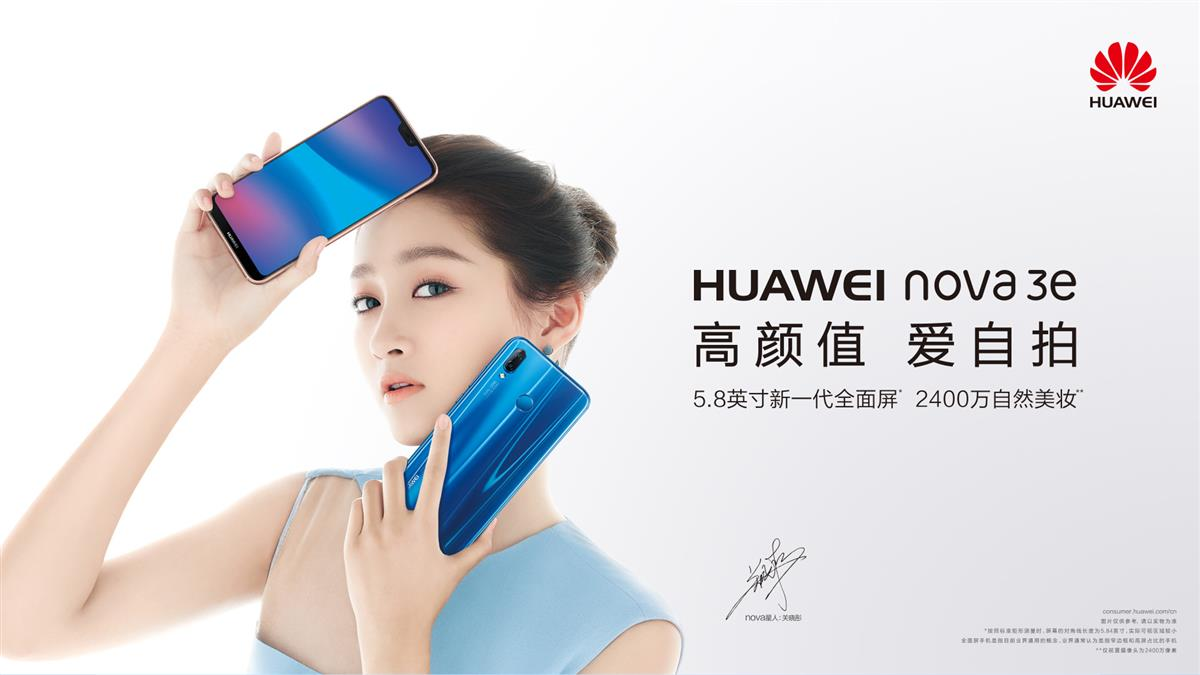
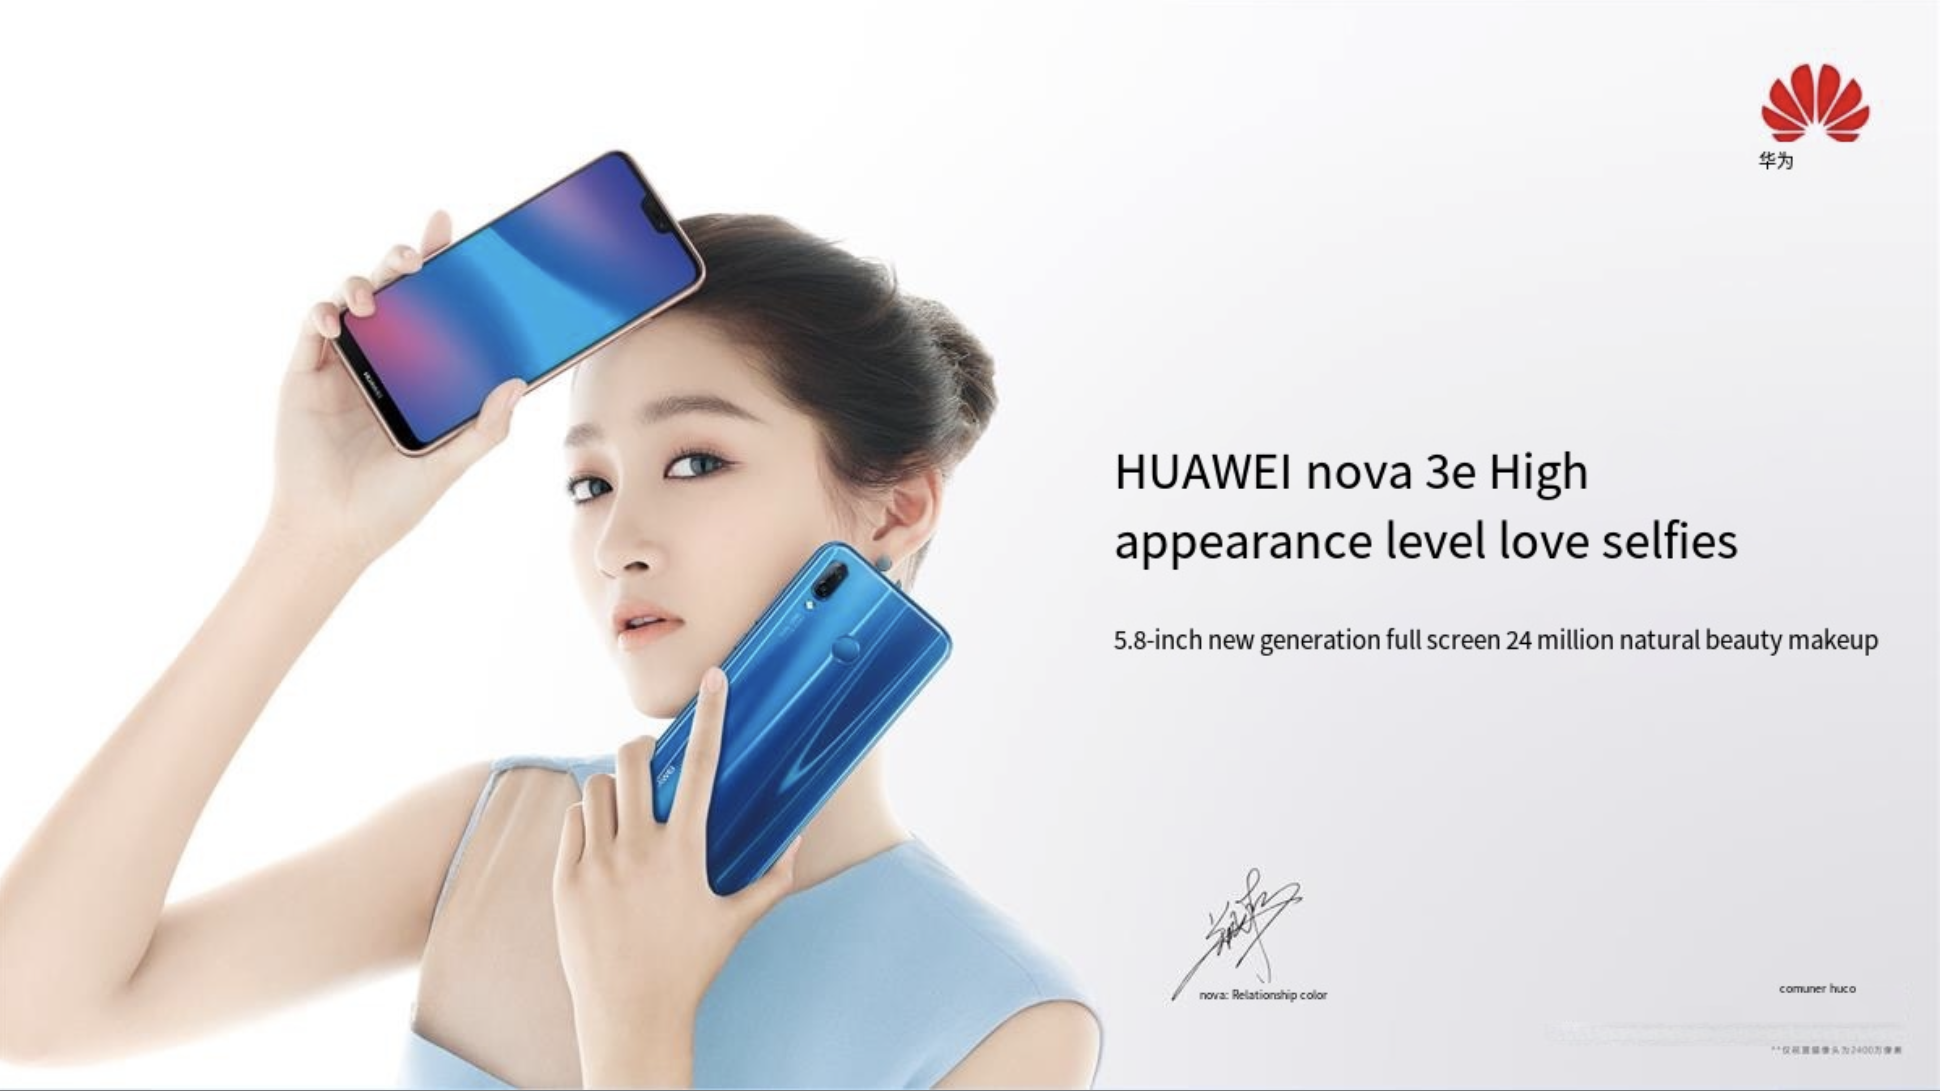
This is a product advertisement for Huawei's nova series, targeting a group of customers who prefer the appearance of the phone's face value and photo-taking attributes. Since the largest font in the ad is "high value, selfie lovers", this segment of customers has low performance requirements, pursues the appearance and fashionability of the phone, and pursues the price point of the phone in the middle to lower range. In my opinion, I am not the target customer of this segment, but this ad is effective and differsentiated.